## Observations and Insights

## Dependencies and starter code

In [1]:
'''
Look across all previously generated figures and tables and write at least
three observations or inferences that can be made from the data. 
Include these observations at the top of notebook.

1) Mice died during the study. Perhaps due to old age not treatment. 
2) Almost 50 % of the mice in the study were female.  
3) In this study tumor volumes in Capomulin and Ramican were lower. 



'''



# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets


# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
ds = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])





## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

dsMean = pd.DataFrame(ds.groupby("Drug Regimen").mean())
dsMean = dsMean['Tumor Volume (mm3)']
dsMedian = pd.DataFrame(ds.groupby("Drug Regimen").median())
dsMedian = dsMedian['Tumor Volume (mm3)']
dsVar = pd.DataFrame(ds.groupby("Drug Regimen").var())
dsVar = dsVar['Tumor Volume (mm3)']
dsStd = pd.DataFrame(ds.groupby("Drug Regimen").std())
dsStd = dsStd['Tumor Volume (mm3)']
dsSem = pd.DataFrame(ds.groupby("Drug Regimen").sem())
dsSem = dsSem['Tumor Volume (mm3)']

dsStats = pd.DataFrame([dsMean,dsMedian,dsVar,dsStd,dsSem],index=['mean','Median','Var','Std','SEM'])

dsStats






Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.322552,40.216745,54.233149,53.236507
Median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.854632,40.673236,52.431737,51.818479
Var,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,42.351070,23.486704,59.450562,48.533355
Std,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.507770,4.846308,7.710419,6.966589
SEM,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.512884,0.320955,0.573111,0.516398


## Bar plots

Text(0.5, 1.0, 'Data Points for each Drug Regimen')

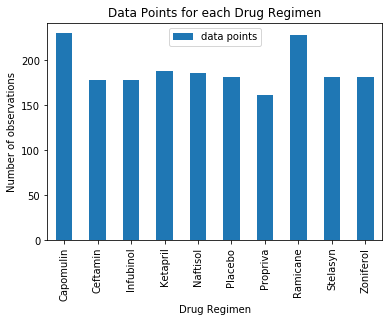

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
dsCount = ds.groupby("Drug Regimen").count()
dsCount['data points'] = dsCount['Mouse ID']
ax = dsCount.plot.bar(y = "data points")
ax.set_ylabel("Number of observations")
ax.set_title('Data Points for each Drug Regimen')


Text(0.5, 1.0, 'Data Points by Drug Regimen')

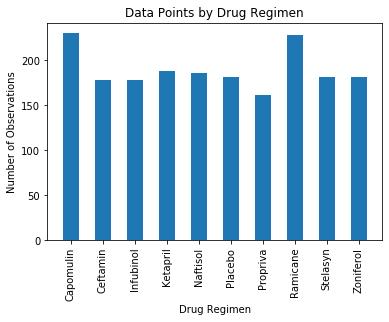

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
labels = dsCount.index.tolist()
#print(labels)

plt.bar(labels, dsCount['Mouse ID'], width = 0.5)
plt.xticks(rotation=90)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observations')

plt.title('Data Points by Drug Regimen')



## Pie plots

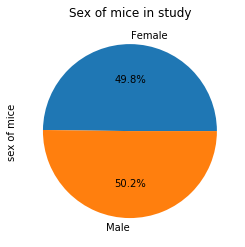

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
SexCount = mouse_metadata.groupby("Sex").count()
SexCount['sex of mice'] = SexCount['Mouse ID']

#print(SexCount)
plot = SexCount.plot.pie(y='sex of mice', legend=False, autopct='%0.1f%%')
plot.set_title('Sex of mice in study')
plot




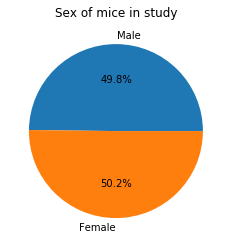

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig1, ax1 = plt.subplots()


ax1.pie(SexCount['sex of mice'],labels = ('Male','Female'),autopct='%0.1f%%',)
ax1.set(title = "Sex of mice in study")
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


## Quartiles, outliers and boxplots

In [7]:


# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.



finaldCap = ds[ds['Drug Regimen'] == 'Capomulin']
finaldCap = finaldCap.loc[finaldCap.groupby('Mouse ID')['Timepoint'].idxmax()]



finaldRam = ds[ds['Drug Regimen'] == 'Ramicane']
finaldRam = finaldRam.loc[finaldRam.groupby('Mouse ID')['Timepoint'].idxmax()]



finaldInf = ds[ds['Drug Regimen'] == 'Infubinol']

finaldInf = finaldInf.loc[finaldInf.groupby('Mouse ID')['Timepoint'].idxmax()]


finaldCef = ds[ds['Drug Regimen'] == 'Ceftamin']
finaldCef = finaldCef.loc[finaldCef.groupby('Mouse ID')['Timepoint'].idxmax()]




quartilesCap = finaldCap['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartilesRam = finaldRam['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartilesInf = finaldInf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
quartilesCef = finaldCef['Tumor Volume (mm3)'].quantile([.25,.5,.75])

lowerqCap = quartilesCap[0.25]
lowerqRam = quartilesRam[0.25]
lowerqInf = quartilesInf[0.25]
lowerqCef = quartilesCef[0.25]

upperqCap = quartilesCap[0.75]
upperqRam = quartilesRam[0.75]
upperqInf = quartilesInf[0.75]
upperqCef = quartilesCef[0.75]

iqrCap = upperqCap-lowerqCap
iqrRam = upperqRam-lowerqRam
iqrInf = upperqInf-lowerqInf
iqrCef = upperqCef-lowerqCef


print(f"The interquartile range of Capomulin is: {iqrCap}")
print(f"The interquartile range of Ramican is: {iqrRam}")
print(f"The interquartile range of Infubinol is: {iqrInf}")
print(f"The interquartile range of Ceftamin is: {iqrCef}")



lowerBoundCap = lowerqCap - (1.5*iqrCap)
lowerBoundRam = lowerqRam - (1.5*iqrRam)
lowerBoundInf = lowerqInf - (1.5*iqrInf)
lowerBoundCef = lowerqCef - (1.5*iqrCef)

upperBoundCap = upperqCap + (1.5*iqrCap)
upperBoundRam = upperqRam + (1.5*iqrRam)
upperBoundInf = upperqInf + (1.5*iqrInf)
upperBoundCef = upperqCef + (1.5*iqrCef)


print(f"Capomulin values below {lowerBoundCap} could be outliers.")
print(f"Ramican values below {lowerBoundRam} could be outliers.")
print(f"Infubinol values below {lowerBoundInf} could be outliers.")
print(f"Ceftamin values below {lowerBoundCef} could be outliers.")

print(f"Capomulin values above {upperBoundCap} could be outliers.")
print(f"Ramican values above {upperBoundRam} could be outliers.")
print(f"Infubinol values above {upperBoundInf} could be outliers.")
print(f"Ceftamin values above {upperBoundCef} could be outliers.")



outliersCap = []
for value in finaldCap['Tumor Volume (mm3)'] :
        if value > upperBoundCap + 1.5*iqrCap or value < lowerBoundCap - 1.5*iqrCap:
            outliersCap.append(value)

print(outliersCap)
if not outliersCap:
  print("No outliers in Capomulin values")
else:
 print("outliers in Capomulin values")

outliersRam = []
for value in finaldRam['Tumor Volume (mm3)'] :
        if value > upperBoundRam + 1.5*iqrRam or value < lowerBoundRam - 1.5*iqrRam:
            outliersRam.append(value)

 
print(outliersRam)
if not outliersRam:
  print("No outliers in Ramican values")
else:
 print("outliers in Ramican values")

outliersInf = []
for value in finaldInf['Tumor Volume (mm3)'] :
        if value > upperBoundInf + 1.5*iqrInf or value < lowerBoundInf - 1.5*iqrInf:
            outliersInf.append(value)

print(outliersInf)

if not outliersInf:
  print("No outliers in Infubinol values")
else:
 print("outliers in Infubinol values")

outliersCef = []
for value in finaldCef['Tumor Volume (mm3)'] :
        if value > upperBoundCef + 1.5*iqrCef or value < lowerBoundCef - 1.5*iqrCef:
            outliersCef.append(value)

print(outliersCef) 
if not outliersCef:
  print("No outliers in Ceftamin values")
else:
 print("Outliers in Ceftamin values")


The interquartile range of Capomulin is: 7.781863460000004
The interquartile range of Ramican is: 9.098536719999998
The interquartile range of Infubinol is: 11.477135160000003
The interquartile range of Ceftamin is: 15.577752179999997
Capomulin values below 20.70456164999999 could be outliers.
Ramican values below 17.912664470000003 could be outliers.
Infubinol values below 36.83290494999999 could be outliers.
Ceftamin values below 25.355449580000002 could be outliers.
Capomulin values above 51.83201549 could be outliers.
Ramican values above 54.30681135 could be outliers.
Infubinol values above 82.74144559000001 could be outliers.
Ceftamin values above 87.66645829999999 could be outliers.
[]
No outliers in Capomulin values
[]
No outliers in Ramican values
[]
No outliers in Infubinol values
[]
No outliers in Ceftamin values


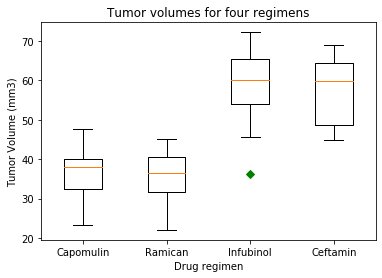

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#finaldCap
CapVols = finaldCap['Tumor Volume (mm3)'].tolist()
RamVols = finaldRam['Tumor Volume (mm3)'].tolist()
InfVols = finaldInf['Tumor Volume (mm3)'].tolist()
CefVols = finaldCef['Tumor Volume (mm3)'].tolist()

#finaldAll.boxplot('Tumor Volume (mm3)')

data = [CapVols, RamVols, InfVols , CefVols]

fig7, ax7 = plt.subplots()
ax7.set_title('Tumor volumes for four regimens')
plt.xlabel('Drug regimen')
plt.ylabel('Tumor Volume (mm3)')
ax7.boxplot(data, 0, 'gD')
ax7.set_xticklabels(['Capomulin', 'Ramican', 'Infubinol', 'Ceftamin'])

plt.show()

In [9]:
st.kruskal(CapVols, RamVols, InfVols , CefVols)

KruskalResult(statistic=68.83750888142104, pvalue=7.571020653675314e-15)

## Line and scatter plots

Text(0.5, 1.0, 'results for mouse s185')

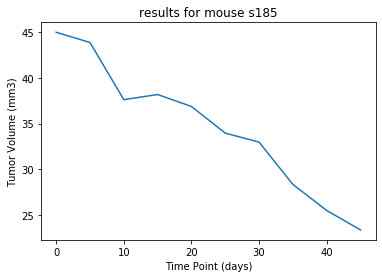

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


#print(CapVols)
mouseVals = ds[ds['Drug Regimen']=='Capomulin']
mouseVals2 = mouseVals[mouseVals['Mouse ID'] == 's185']
#print(mouseVals)
#plt.plot(mouseVals)

mouseTV = mouseVals2['Tumor Volume (mm3)'].tolist()
mouseTime = mouseVals2['Timepoint'].tolist()

plt.plot(mouseTime,mouseTV)
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title('results for mouse s185')


The r-squared is: 0.8419363424694718


Text(0.5, 1.0, 'mouse weight versus average tumor volume for the Capomulin regimen')

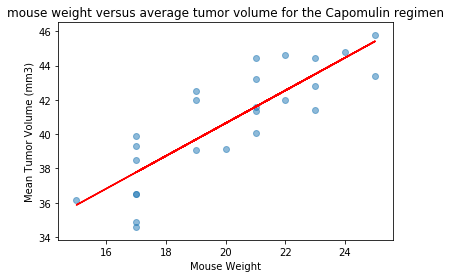

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouseVals = ds[ds['Drug Regimen']=='Capomulin']
#print(mouseVals)

mv5 = mouseVals.groupby(['Mouse ID']).mean()
mv6 = mv5['Tumor Volume (mm3)'].tolist()
mv7 = mv5['Weight (g)'].tolist()
(slope, intercept, rvalue, pvalue, stderr) = linregress(mv7, mv6)
print(f"The r-squared is: {rvalue}")

regress_values = []
for i in mv7:
    
    regress_values.append ( i * slope + intercept )
plt.plot(mv7,regress_values,"r-")
plt.scatter(mv7, mv6, alpha=0.5)
plt.xlabel("Mouse Weight")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.title('mouse weight versus average tumor volume for the Capomulin regimen')

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mv7,mv6)
print(f"The correlation between both factors is {round(correlation[0],2)}")




The correlation between both factors is 0.84
